# Problema de Regresion Simple con 2 Variables

Aprende regresion lineal es un claro ejemplo que 

### Librerias

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("salary.csv")

In [84]:
df.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [4]:
df.shape

(30, 2)

In [27]:
x = df.iloc[:,:-1].values
#x

In [6]:
y = df.iloc[:,1].values
y

array([42500, 36302, 35000, 18103, 15000, 37000, 26300, 35201, 18302,
       42000, 27000, 35201, 19201, 28000, 17000, 33402, 19000, 18200,
       19000, 17301, 28000, 20000, 27900, 17500, 40000, 42500, 18300,
       40000, 25000, 15000], dtype=int64)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 14 )

In [8]:
X_train.shape

(24, 1)

In [9]:
Y_train.shape

(24,)

Instanciar modelo

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,Y_train)

LinearRegression()

### Visualizar Resultados

    - Convencionalmente se utiliza Matplotlib o seaborn para plotear data
    - Para Futuros casos utilizare plotly que cuenta con una interfaz mas visual

##### Matplotlib

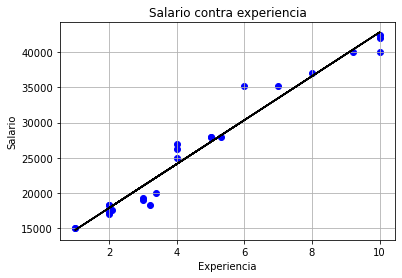

In [13]:
plt.scatter(X_train,Y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'black')
plt.title("Salario contra experiencia")
plt.xlabel("Experiencia")
plt.ylabel("Salario")
plt.grid()
plt.show()

###### Plotly

In [12]:
import plotly.graph_objects as go

In [78]:
x_range = df.iloc[:,:-1].values.squeeze()
y_range = model.predict(x_range.reshape(-1,1))

In [79]:
fig = go.Figure([
    go.Scatter(x= X_train.squeeze(), y= Y_train, name="train", mode='markers'),
    go.Scatter(x = X_test.squeeze(), y= Y_test, name = "test", mode = 'markers'),
    go.Scatter(x = x_range, y = y_range, name = "predict", mode='lines')
])
fig.show()

In [81]:
model.score(X_test, Y_test)

0.8239239780938947

# Regresion con 3 Varieables

In [93]:
#agregando variables
Paises = ['Peru', "US", "Brazil", "Mexico", "Japon"]

In [94]:
le = LabelEncoder()
le_Pa = le.fit_transform(Paises)
le_Pa

array([3, 4, 0, 2, 1], dtype=int64)

In [95]:
import random
df['pais'] = [random.choice(le_Pa) for i in range(len(df))]

In [97]:
df.head(10)

,Aexperiencia,Salario,pais
0,10.0,42500,4
1,8.0,36302,4
2,5.4,35000,2
3,2.5,18103,1
4,1.0,15000,4
5,8.0,37000,2
6,4.0,26300,4
7,6.0,35201,3
8,2.0,18302,0
9,10.0,42000,0


In [102]:
x = df.drop('Salario',axis = 1)
y = df['Salario']

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 45 )

In [104]:
model_3v = LinearRegression()
model_3v.fit(X_train,Y_train)

LinearRegression()

In [120]:
x_range = df['Aexperiencia'].values.squeeze()
y_range = df['pais'].values.squeeze() 
xx , yy = np.meshgrid(x_range,y_range)
pred = model_3v.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

In [ ]:
xx, yy = np.meshgrid(xrange, yrange)
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)


In [139]:
fig = go.Figure([
    go.Scatter3d(x= X_train['Aexperiencia'], y= X_train['pais'], z= Y_train, name='Train', mode ='markers'),
    go.Scatter3d(x= X_test['Aexperiencia'], y= X_test['pais'], z= Y_test, name='Test', mode ='markers'),
    go.Surface(x= x_range, y= y_range, z= pred, name='predict')
])
fig.show()